In [1]:
import csv
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split
import data

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
train_data = pd.read_csv("data/train_with_embeddings.csv")

In [ ]:
train_data.columns

Index(['Unnamed: 0', 'text', 'retweets_count', 'favorites_count',
       'followers_count', 'statuses_count', 'friends_count', 'mentions',
       'urls', 'verified', 'hashtags', 'timestamp', 'TweetID', '0', '1', '2',
       '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15',
       '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27',
       '28', '29', '30', '31'],
      dtype='object')

In [ ]:
train_data = train_data.drop(["Unnamed: 0"], axis=1)

In [ ]:
# new features
train_data["url_count"] = train_data["urls"].apply(lambda s: s[1:-1].count("\'")/2)
train_data["text_len"] = train_data["text"].apply(lambda s: len(s))
train_data["hashtags_count"] = train_data["hashtags"].apply(lambda s: s[1:-1].count("\'")/2)
train_data["day"] = train_data["timestamp"].apply(lambda t: datetime.utcfromtimestamp(t/1000).day)
train_data["hour"] = train_data["timestamp"].apply(lambda t: datetime.utcfromtimestamp(t/1000).hour)

# text features
train_data["avg_word_len"] = train_data["text"].apply(lambda s: np.mean([len(w) for w in s.split()]))
train_data["rep_words_freq"] = train_data["text"].apply(lambda s: np.mean(len(list(set(s.split())))/len(s.split())))
train_data["rep_chars_freq"] = train_data["text"].apply(lambda s: np.mean(len(list(set(s)))/len(list(s))))
train_data["max_char_freq"] = train_data["text"].apply(lambda s: max( [s.count(c) for c in list(set(s))] )   /len(list(s)))
train_data["avg_word_count"] = train_data["text"].apply(lambda s: len(s.split()))

train_data["log"] = np.log(0.1 + train_data["favorites_count"])

# indicators of keywords
# train_data["Macron"] =  train_data["text"].apply(lambda s: ("macron" in s.lower().split()))
# train_data["Zemmour"] =  train_data["text"].apply(lambda s: ("zemmour" in s.lower().split()))
# train_data["Melenchon"] =  train_data["text"].apply(lambda s: ("melenchon" in s.replace("é","e").lower().split()))
train_data["rt"] =  train_data["text"].apply(lambda s: ("rt" in s.lower().split()))

In [ ]:
train_data = data.feature_words_arr(train_data)
train_data = data.feature_delete_stop_words(train_data, 'text_without_stopwords')
train_data = data.feature_sent_analysis(train_data, 'text_without_stopwords')
train_data = data.feature_abbrev(train_data)
display(train_data)
# # outlier removal
# train_data = train_data[train_data["retweets_count"] <= 40000]

,text,retweets_count,favorites_count,followers_count,statuses_count,friends_count,mentions,urls,verified,hashtags,...,rep_chars_freq,max_char_freq,avg_word_count,log,rt,text_arr,text_without_stopwords,polarity,subjectivity,abrev
0,rt refarcir macron ans nom prépare,3,0,3682,453535,3628,[],[],0,[],...,0.411765,0.205882,6,-2.302585,True,"[rt, refarcir, macron, ans, nom, prépare]",rt refarcir macron ans nom prépare,0.00,0.000,0.000000
1,populaire,0,0,86,1016,284,[],[],0,[],...,0.888889,0.222222,1,-2.302585,False,[populaire],populaire,0.50,0.500,0.000000
2,faut dégager cinglé,3,1,1944,28234,1995,[],[],0,[],...,0.736842,0.157895,3,0.095310,False,"[faut, dégager, cinglé]",faut dégager cinglé,-0.01,-0.010,0.000000
3,enseignants mettre prescriptions président rép...,0,0,1,1072,0,[],['https://t.co/rytlted08g'],0,[],...,0.170732,0.138211,14,-2.302585,False,"[enseignants, mettre, prescriptions, président...",enseignants mettre prescriptions président rép...,0.06,0.125,0.000000
4,mafieuse oppressive macron,0,0,13957,25311,10841,[],[],0,[],...,0.538462,0.153846,3,-2.302585,False,"[mafieuse, oppressive, macron]",mafieuse oppressive macron,0.00,0.000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353964,gonflette tour raciste frustré,0,0,34,1509,55,[],['https://t.co/pma33zhslx'],0,[],...,0.500000,0.166667,4,-2.302585,False,"[gonflette, tour, raciste, frustré]",gonflette tour raciste frustré,0.00,0.000,0.000000
353965,france caste crapuleuse encadrée gangsters irr...,0,0,89,11166,127,[],[],0,[],...,0.260870,0.159420,7,-2.302585,False,"[france, caste, crapuleuse, encadrée, gangster...",france caste crapuleuse encadrée gangsters irr...,0.10,0.200,0.000000
353966,eric zemmour français berbère,3,0,1888,712,3086,[],[],0,[],...,0.551724,0.172414,4,-2.302585,False,"[eric, zemmour, français, berbère]",eric zemmour français berbère,0.20,0.000,0.000000
353967,gauchistes dépression pq,0,0,139,486,320,[],[],0,[],...,0.708333,0.166667,3,-2.302585,False,"[gauchistes, dépression, pq]",gauchistes dépression pq,0.00,0.000,0.333333


In [ ]:
# from nltk.sentiment import SentimentIntensityAnalyzer
# sia = SentimentIntensityAnalyzer()
# print("sentiment analysis...")
# train_data["compound"] =  train_data["text"].apply(lambda s: sia.polarity_scores(s)['compound'])

In [ ]:
# select useful columns
train_data_filtered = train_data.drop(["text", "urls", "mentions", "hashtags", "timestamp", "TweetID",
                                        "text_arr", "text_without_stopwords"], axis=1)

In [ ]:
# train_data_filtered = train_data.loc[:, ["retweets_count","favorites_count","followers_count","statuses_count","friends_count",
#                                  "hashtags_count","hour","verified","url_count","text_len","rt","Macron","Zemmour","Melenchon"]]


X_train, X_eval, y_train, y_eval = train_test_split(train_data_filtered.drop("retweets_count", axis=1),
                                                    train_data_filtered["retweets_count"],
                                                    random_state=42, test_size=0.1)

# Standardize the data
normal_columns = train_data_filtered.drop(["hour", "verified", "url_count", "rt", "retweets_count"], axis=1).columns
# normal_columns = train_data_filtered.drop(["hour", "verified", "url_count", "rt", "retweets_count"], axis=1).columns
mu, sigma = X_train[normal_columns].mean(axis=0), X_train[normal_columns].std(axis=0)
X_train.loc[:, normal_columns] = (X_train[normal_columns] - mu) / sigma
X_eval.loc[:, normal_columns] = (X_eval[normal_columns] - mu) / sigma

In [ ]:
import tensorflow as tf

In [ ]:
# model = tf.keras.models.Sequential([
#   tf.keras.layers.Dense(32, activation='relu'),
#   tf.keras.layers.Dense(32, activation='relu'),
#   tf.keras.layers.Dense(32, activation='relu'),
#   tf.keras.layers.Dense(1),
# ])

model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(21, activation='relu'),
  # tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(21, activation='relu'),
  tf.keras.layers.Dense(21, activation='relu'),
  tf.keras.layers.Dense(1),
])

# model = tf.keras.models.Sequential([
#   tf.keras.layers.Dense(128, activation='relu'),
#   tf.keras.layers.Dropout(0.2),
#   tf.keras.layers.Dense(128, activation='relu'),
#   tf.keras.layers.Dropout(0.2),
#   tf.keras.layers.Dense(128, activation='relu'),
#   tf.keras.layers.Dropout(0.2),
#   tf.keras.layers.Dense(1),
# ])

2022-12-06 03:08:10.749437: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
# model.compile(optimizer="adam", loss='mae')

In [ ]:
import tensorflow_addons as tfa
optimizer = tfa.optimizers.AdamW(learning_rate=1e-3, weight_decay=1e-6)
model.compile(optimizer=optimizer, loss='mae')

In [ ]:
history = model.fit(X_train.values.astype(np.float32), y_train.values.astype(np.float32), epochs=75, batch_size=1024,
         validation_data=(X_eval.values.astype(np.float32), y_eval.values.astype(np.float32)), shuffle=True)

Epoch 1/75
312/312 [==============================] - 1s 2ms/step - loss: 14.6442 - val_loss: 12.5955
Epoch 2/75
312/312 [==============================] - 1s 2ms/step - loss: 9.1508 - val_loss: 6.7503
Epoch 3/75
312/312 [==============================] - 1s 3ms/step - loss: 6.8084 - val_loss: 6.5639
Epoch 4/75
312/312 [==============================] - 0s 1ms/step - loss: 6.6775 - val_loss: 6.5236
Epoch 5/75
312/312 [==============================] - 1s 2ms/step - loss: 6.6163 - val_loss: 6.4130
Epoch 6/75
312/312 [==============================] - 1s 2ms/step - loss: 6.5801 - val_loss: 6.3584
Epoch 7/75
312/312 [==============================] - 1s 2ms/step - loss: 6.5347 - val_loss: 6.3735
Epoch 8/75
312/312 [==============================] - 1s 2ms/step - loss: 6.4968 - val_loss: 6.3557
Epoch 9/75
312/312 [==============================] - 1s 3ms/step - loss: 6.4754 - val_loss: 6.2737
Epoch 10/75
312/312 [==============================] - 1s 2ms/step - loss: 6.4497 - val_loss: 6.25

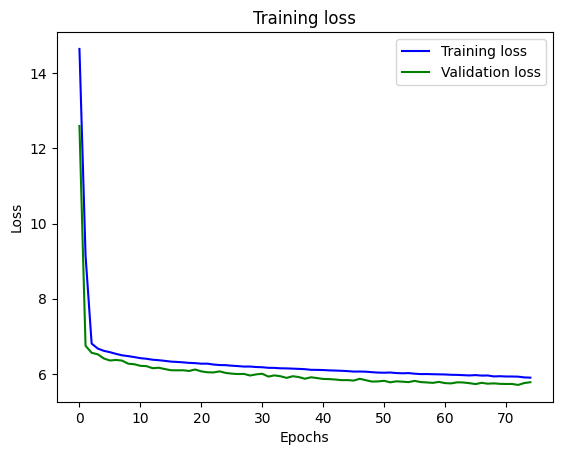

In [ ]:
plt.plot(history.epoch, history.history["loss"], 'b', label='Training loss')
plt.plot(history.epoch, history.history["val_loss"], 'g', label='Validation loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model.evaluate(X_eval.values.astype(np.float32),  y_eval.values.astype(np.float32), verbose=2)

1107/1107 - 1s - loss: 5.6089 - 519ms/epoch - 468us/step


5.608860015869141

In [ ]:
pred = model.predict(X_eval.values.astype(np.float32))
print(pred)

1107/1107 [==============================] - 1s 541us/step
[[1.1453982e-02]
 [7.2697364e-03]
 [6.8483740e-01]
 ...
 [1.4571663e-02]
 [1.7139431e-02]
 [1.5089805e+01]]


In [ ]:
eval_data = X_eval.copy()
eval_data ["groundtruth"] = y_eval
eval_data["pred"] = pred

In [ ]:
eval_data

,favorites_count,followers_count,statuses_count,friends_count,verified,0,1,2,3,4,...,avg_word_count,log,Macron,Zemmour,rt,polarity,subjectivity,abrev,groundtruth,pred
307625,-0.055089,-0.077407,-0.334165,-0.497254,0,0.008149,0.731841,-0.170714,-1.877710,-0.995912,...,0.145207,-0.564477,-0.601175,-0.379343,False,0.794312,-0.754931,-0.389772,0,0.011454
52950,-0.055089,-0.077779,-0.408998,-0.502035,0,0.376416,-0.417564,-1.208763,1.026855,-2.341159,...,0.339408,-0.564477,-0.601175,-0.379343,False,0.989324,0.480421,-0.389772,0,0.007270
289882,-0.055089,-0.067681,2.979071,1.399853,0,0.691572,-0.655960,0.224789,-1.033007,2.179209,...,0.145207,-0.564477,-0.601175,-0.379343,True,-1.459153,0.963819,-0.389772,0,0.684837
17637,-0.055089,-0.075549,0.847381,-0.566985,0,-0.076841,0.729537,0.848256,-0.417382,0.304030,...,0.145207,-0.564477,-0.601175,-0.379343,True,0.144274,0.534132,2.679304,0,0.004103
339255,-0.053906,-0.028786,-0.027463,0.115989,0,-0.058760,-0.127474,0.371056,0.482839,-2.084839,...,-0.048994,0.474196,1.663403,-0.379343,False,-0.072405,-0.754931,-0.389772,1,1.240436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308634,-0.055089,-0.071539,0.205442,0.380173,0,0.380697,0.716708,-1.005423,-0.727449,0.030930,...,-1.214200,-0.564477,-0.601175,-0.379343,False,-0.072405,-0.754931,-0.389772,3,0.813151
276530,-0.053906,-0.077630,-0.393446,-0.539890,0,-0.526453,0.082621,1.052789,0.868463,-0.749671,...,0.533609,0.474196,-0.601175,-0.379343,False,0.216501,-0.110400,-0.389772,3,1.122044
302150,-0.055089,-0.076848,-0.012975,-0.174096,0,-0.299950,-0.032991,-0.322349,-0.525828,0.733617,...,-0.437396,-0.564477,-0.601175,-0.379343,False,-0.397424,-0.325244,1.802425,0,0.014572
55651,-0.055089,-0.077729,-0.401657,-0.502434,0,0.435267,-0.361918,-0.277946,-0.782868,-0.698079,...,-1.019999,-0.564477,-0.601175,-0.379343,False,-0.072405,-0.754931,-0.389772,0,0.017139


In [ ]:
# eval_data.to_csv("pred_example_58")

In [ ]:
# plt.scatter(X_train["favorites_count"], model.predict(X_train))
# plt.scatter(X_train["favorites_count"], y_train.values.astype(np.float32))

In [ ]:
# evaluation

eval_data = pd.read_csv("data/evaluation_with_embeddings.csv")
eval_data = eval_data.drop(["Unnamed: 0"], axis=1)
tweets = eval_data["TweetID"]

In [ ]:
eval_data["url_count"] = eval_data["urls"].apply(lambda s: s[1:-1].count("\'")/2)
eval_data["text_len"] = eval_data["text"].apply(lambda s: len(s))
eval_data["hashtags_count"] = eval_data["hashtags"].apply(lambda s: s[1:-1].count("\'")/2)
eval_data["day"] = eval_data["timestamp"].apply(lambda t: datetime.utcfromtimestamp(t/1000).day)
eval_data["hour"] = eval_data["timestamp"].apply(lambda t: datetime.utcfromtimestamp(t/1000).hour)
# eval_data["Macron"] =  eval_data["text"].apply(lambda s: ("macron" in s.lower().split()))
# eval_data["Zemmour"] =  eval_data["text"].apply(lambda s: ("zemmour" in s.lower().split()))
# eval_data["Melenchon"] =  eval_data["text"].apply(lambda s: ("melenchon" in s.lower().split()))
eval_data["avg_word_len"] = eval_data["text"].apply(lambda s: np.mean([len(w) for w in s.split()]))
eval_data["rep_words_freq"] = eval_data["text"].apply(lambda s: np.mean(len(list(set(s.split())))/len(s.split())))
eval_data["rep_chars_freq"] = eval_data["text"].apply(lambda s: np.mean(len(list(set(s)))/len(list(s))))
eval_data["max_char_freq"] = eval_data["text"].apply(lambda s: max( [s.count(c) for c in list(set(s))] )/len(list(s)))
eval_data["avg_word_count"] = eval_data["text"].apply(lambda s: len(s.split()))

eval_data["log"] = np.log(0.1 + eval_data["favorites_count"])

# indicators of keywords
eval_data["Macron"] =  eval_data["text"].apply(lambda s: ("macron" in s.lower().split()))
eval_data["Zemmour"] =  eval_data["text"].apply(lambda s: ("zemmour" in s.lower().split()))
# eval_data["Melenchon"] =  eval_data["text"].apply(lambda s: ("melenchon" in s.replace("é","e").lower().split()))
eval_data["rt"] =  eval_data["text"].apply(lambda s: ("rt" in s.lower().split()))

# print("sentiment analysis...")
# eval_data["compound"] =  eval_data["text"].apply(lambda s: sia.polarity_scores(s)['compound'])

eval_data = data.feature_words_arr(eval_data)
eval_data = data.feature_delete_stop_words(eval_data, 'text_without_stopwords')
eval_data = data.feature_sent_analysis(eval_data, 'text_without_stopwords')
eval_data = data.feature_abbrev(eval_data)

eval_data = eval_data.drop(["text", "urls", "mentions", "hashtags", "timestamp", "TweetID",
                                        "text_arr", "text_without_stopwords"], axis=1)

# normalize
eval_data.loc[:, normal_columns] = (eval_data.loc[:, normal_columns] - mu) / sigma

display(eval_data)

,favorites_count,followers_count,statuses_count,friends_count,verified,0,1,2,3,4,...,rep_chars_freq,max_char_freq,avg_word_count,log,Macron,Zemmour,rt,polarity,subjectivity,abrev
0,-0.055089,-0.077561,-0.384487,-0.451430,0,0.627411,-0.188243,-1.069439,-0.627192,-0.398087,...,1.110779,2.917037,-1.214200,-0.564477,-0.601175,-0.379343,False,-0.072405,-0.754931,-0.389772
1,-0.055089,-0.076250,-0.130940,-0.405207,0,-0.000590,0.682637,-0.716718,-0.610757,1.009279,...,1.251218,-0.457844,-1.019999,-0.564477,-0.601175,-0.379343,False,-0.072405,-0.754931,-0.389772
2,-0.047990,-0.073569,-0.308274,0.054226,0,-0.004098,0.635851,-0.348722,-0.520216,0.882950,...,0.329674,0.111941,-0.631597,1.216190,-0.601175,-0.379343,False,-0.072405,1.393507,-0.389772
3,-0.052722,-0.071378,-0.197070,0.229552,0,1.204404,-3.270518,1.816433,2.189510,-0.580318,...,-1.044832,-0.390242,1.310413,0.754289,1.663403,-0.379343,False,-0.939123,0.319288,0.569314
4,-0.055089,-0.076932,-0.241396,-0.434694,0,-1.208759,-0.901484,1.551472,0.123558,1.186333,...,-1.017076,-0.578708,1.504614,-0.564477,-0.601175,2.636129,False,-0.289085,0.405225,-0.389772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117985,-0.055089,-0.077871,-0.421834,-0.556227,0,0.249026,0.352226,-0.638636,-0.657624,-0.304555,...,0.886078,0.111941,-1.019999,-0.564477,-0.601175,-0.379343,False,-0.072405,-0.754931,-0.389772
117986,-0.055089,-0.075036,-0.076371,-0.225498,0,-0.190405,-0.782128,-1.860208,0.260190,-0.092876,...,-1.027759,-0.705406,1.698815,-0.564477,-0.601175,-0.379343,False,-0.072405,-0.754931,-0.389772
117987,-0.040891,-0.074347,-0.403582,-0.518372,0,0.521246,0.220602,-1.257055,0.863901,-1.019101,...,-0.574482,-0.223227,0.145207,1.512869,1.663403,-0.379343,False,-1.480821,1.393507,-0.389772
117988,-0.055089,-0.077867,-0.423504,-0.549851,0,-0.926892,-1.348052,0.007385,2.060643,-0.080239,...,-1.004058,0.480625,1.504614,-0.564477,-0.601175,-0.379343,False,2.094389,3.112258,0.512898


In [ ]:
display(X_train)

,favorites_count,followers_count,statuses_count,friends_count,verified,0,1,2,3,4,...,rep_chars_freq,max_char_freq,avg_word_count,log,Macron,Zemmour,rt,polarity,subjectivity,abrev
286184,-0.055089,-0.077844,-0.421579,-0.525943,0,-0.454199,-0.479638,-0.839479,-0.937126,1.109783,...,0.026925,-0.066815,-0.243195,-0.564477,-0.601175,-0.379343,False,-0.072405,-0.754931,-0.389772
83577,-0.055089,-0.067811,-0.070867,0.325185,0,-0.049611,-1.883312,0.014960,0.632474,-0.894389,...,-1.000478,-0.125469,0.533609,-0.564477,-0.601175,-0.379343,False,0.924320,-0.038785,-0.389772
165861,-0.055089,-0.077714,-0.417499,-0.523552,0,-0.515792,-0.471596,-0.023280,-0.515503,0.730691,...,0.301854,1.226187,-0.631597,-0.564477,-0.601175,-0.379343,False,-0.072405,-0.754931,-0.389772
314938,-0.045624,-0.071025,-0.322850,-0.292042,0,1.506209,-0.835940,-0.163854,-0.338194,1.489977,...,-0.640871,-0.095254,0.727810,1.339024,-0.601175,-0.379343,False,-1.394150,1.715773,-0.389772
301981,-0.052722,-0.076427,-0.310814,-0.221115,0,0.193906,-0.743971,1.567646,0.206960,0.283644,...,-1.222545,-1.276674,1.310413,0.754289,-0.601175,-0.379343,False,0.490961,0.383741,-0.389772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,-0.055089,-0.074569,-0.374245,-0.252993,0,1.221808,0.319591,0.832282,-0.891572,1.490662,...,-0.119553,0.261393,-0.437396,-0.564477,-0.601175,-0.379343,False,-0.072405,-0.754931,-0.389772
259178,-0.055089,-0.067190,-0.409402,-0.420349,0,-0.331935,0.591412,-0.061578,0.488688,-0.477316,...,-0.195818,-0.310122,-0.243195,-0.564477,1.663403,-0.379343,False,-1.372482,1.393507,-0.389772
131932,-0.055089,-0.062559,-0.417992,0.397706,0,-0.084263,-1.102450,-0.089161,1.266020,-0.328144,...,-0.671853,-0.546477,0.533609,-0.564477,-0.601175,-0.379343,False,-0.072405,-0.754931,0.889010
146867,-0.055089,-0.076515,-0.175583,-0.372135,0,0.574601,-3.972517,-1.152867,0.601042,0.571519,...,-0.999184,0.079613,2.281418,-0.564477,-0.601175,2.636129,False,2.744427,1.823195,0.340960


In [ ]:
pred = model.predict(eval_data.values.astype(np.float32))

print(pred)

# output normalization
for i,p in enumerate(pred):
    if p<0: pred[i] = 0

3688/3688 [==============================] - 2s 475us/step
[[ 1.2847360e-02]
 [ 8.3314143e-03]
 [ 2.5101335e+00]
 ...
 [ 4.1257033e+00]
 [ 1.4819022e-02]
 [-1.1770763e-03]]


In [ ]:
with open("data/predictions.csv", 'w') as f:
    writer = csv.writer(f)
    writer.writerow(["TweetID", "retweets_count"])
    for index, prediction in enumerate(pred):
        writer.writerow([str(tweets[index]) , str(int(prediction))])